In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 0: Importing and reading the dataset 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Akshay Shivani\.cache\kagglehub\datasets\iamsouravbanerjee\customer-shopping-trends-dataset\versions\2


In [3]:
from pathlib import Path

dir_path = Path(r"C:\Users\Akshay Shivani\.cache\kagglehub\datasets\iamsouravbanerjee\customer-shopping-trends-dataset\versions\2")

file_to_read = next(dir_path.glob("*csv"))
df = pd.read_csv(file_to_read)

In [4]:
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
df.shape

(3900, 19)

In [7]:
##There are total of 3900 records of customers and 19 columns

In [8]:
df.columns ## Displaying the columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [9]:
df.dtypes ### Checking the datatypes of the columns

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [10]:
df.describe() ## checking the descriptive summary of the dataset

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


##### Inference:
    1)It is observed that Mean Age of Customers is 44, with max being 70 yrs and minimum age being 18 yrs
    2)Avg purchase amount is 59.76 $
    3)Avg Rating by customers is 3.75

#### Step 2: Data Preparation
    1)Dropping Irrelevant Columns
    2)identifying Duplicated records
    3)Renaming Columns
    4)Feature Creation

In [11]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [12]:
df = df[[#'Customer ID',
     'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases']].copy()

In [13]:
df.head(2)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


In [14]:
df.shape ## Dropped Customer ID as the same is irrelevant

(3900, 18)

In [15]:
df.isna().sum() ## Checking for null values in the dataset

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [16]:
df.duplicated().sum() ## There are no duplicated records in the dataset

0

## Step 3: Feature Understanding:
    (Univariate Analysis):
        1)Histogram
        2)KDE
        3)Boxplot

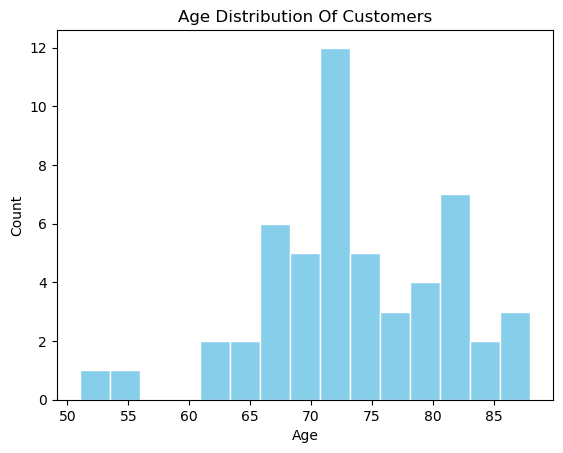

In [17]:
ax = df['Age'].value_counts().plot(kind = 'hist',
                                   bins = 15,
                                   color = 'skyblue',
                                   title =('Age Distribution Of Customers'),
                                   edgecolor = 'white')
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()

#### Inference:
    It is observed that most of the customers are in the age group of 65-85

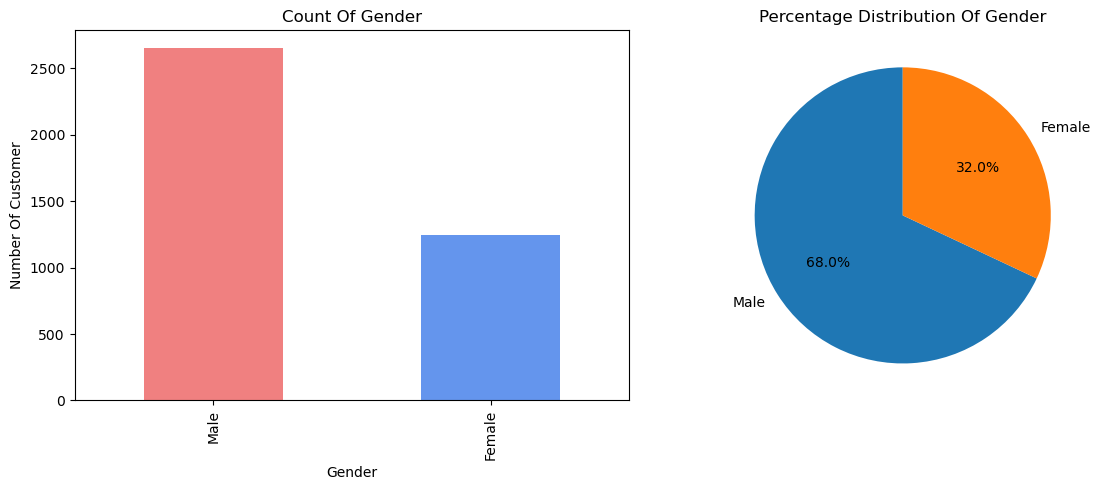

In [18]:
fig, ax = plt.subplots(1,2 ,figsize = (12,5))

df['Gender'].value_counts()\
    .plot(kind = 'bar', ax = ax[0],color = ['lightcoral', 'cornflowerblue'])
ax[0].set_title("Count Of Gender")
ax[0].set_ylabel('Number Of Customer')

df['Gender'].value_counts()\
    .plot(kind = 'pie', ax = ax[1], autopct = "%1.1f%%", startangle = 90)
ax[1].set_title('Percentage Distribution Of Gender')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

##### Inference:
    It is observed that most of the customers are male (68%)

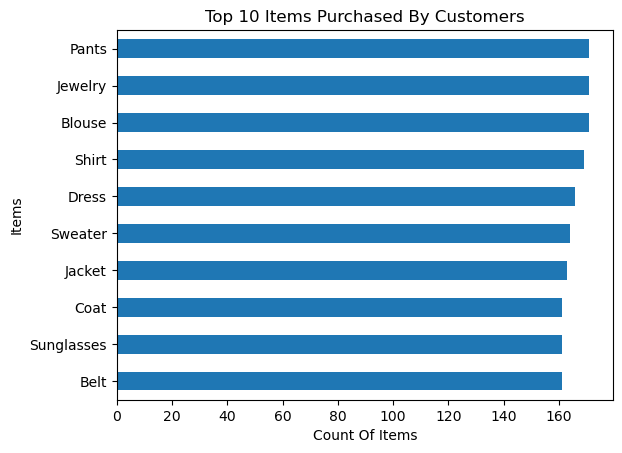

In [19]:
ax = df['Item Purchased'].value_counts().head(10)\
    .sort_values(ascending = True)\
    .plot(kind = 'barh', title = "Top 10 Items Purchased By Customers")
ax.set_xlabel("Count Of Items")
ax.set_ylabel('Items')
plt.show()

##### Inference:
    Pants, Jewelry & Blouse are the top 3 items preferred by the customers with the maximum number of sales

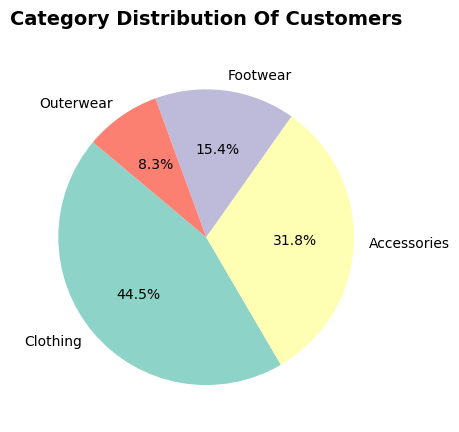

In [20]:
colors = plt.get_cmap('Set3').colors
df_Category = df['Category'].value_counts(normalize = True)*100
df_Category.plot(kind='pie',autopct = "%1.1f%%",startangle=140, colors=colors)
plt.title('Category Distribution Of Customers', fontsize=14, fontweight='bold', pad=20)
plt.ylabel("")
plt.show()

#### Inference: 
    Clothing(44.5%) are the most preferred purchases followed by Accessories(31.8%) by the customers

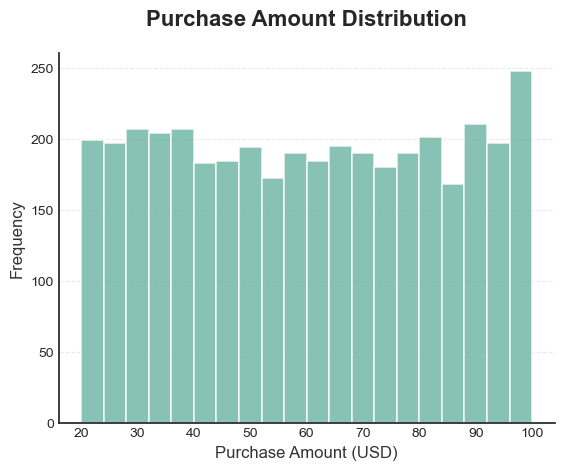

In [21]:
plt.style.use('seaborn-v0_8-white')

ax = df['Purchase Amount (USD)'].plot(kind = 'hist',
                                      bins =20,
                                      color='#69b3a2',
                                      edgecolor='white',
                                      linewidth=1.2,
                                      alpha=0.8
                                      )
ax.set_title('Purchase Amount Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Purchase Amount (USD)', fontsize=12, color='#333333')
ax.set_ylabel('Frequency', fontsize=12, color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

##### Inference:
    From the graph it is observed that most customers are making purchases over 100$

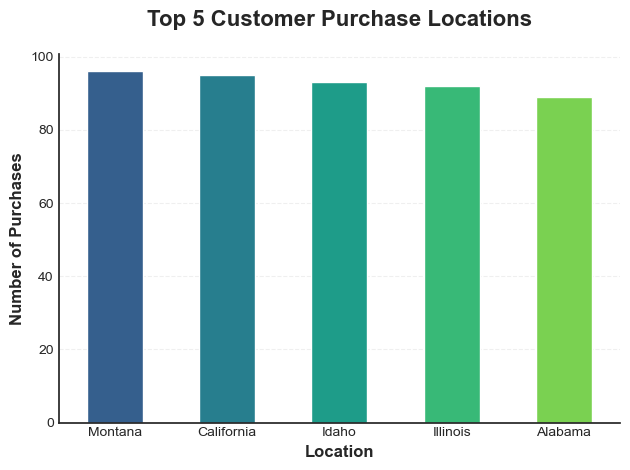

In [22]:
colors = plt.cm.viridis(np.linspace(0.3, 0.8, 5))
ax = df['Location'].value_counts().sort_values(ascending = False).head(5)\
    .plot(kind = 'bar',
          color = colors,
          edgecolor = 'white',
          rot = 0
         )
ax.set_title('Top 5 Customer Purchase Locations', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Location', fontsize=12, fontweight='semibold')
ax.set_ylabel('Number of Purchases', fontsize=12, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### Inference
    The Top 5 Locations Of Customer Purchases are  : Montana, California, Idaho, Illionois & Alabama

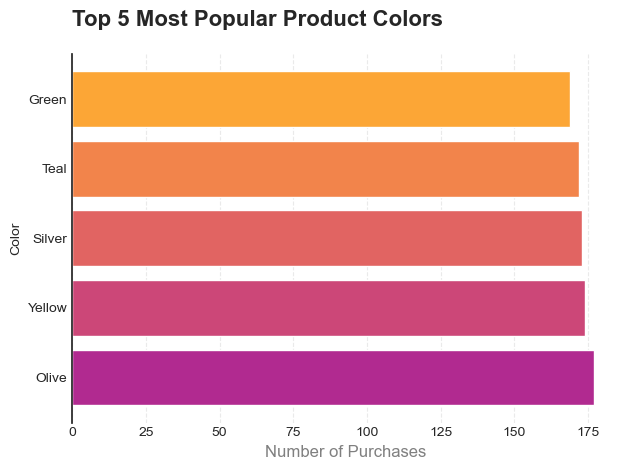

In [23]:
my_colors = plt.cm.plasma(np.linspace(0.4, 0.8, 5))

ax = df['Color'].value_counts().sort_values(ascending = False).head()\
    .plot(kind = 'barh',
         color = my_colors,
         edgecolor = 'white',
         width = 0.8)
ax.set_title('Top 5 Most Popular Product Colors', fontsize=16, fontweight='bold', loc='left', pad=20)
ax.set_xlabel('Number of Purchases', fontsize=12, color='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

##### Inference:
    Olive, Yellow & Silver Colors are the most preferred colours by the customers

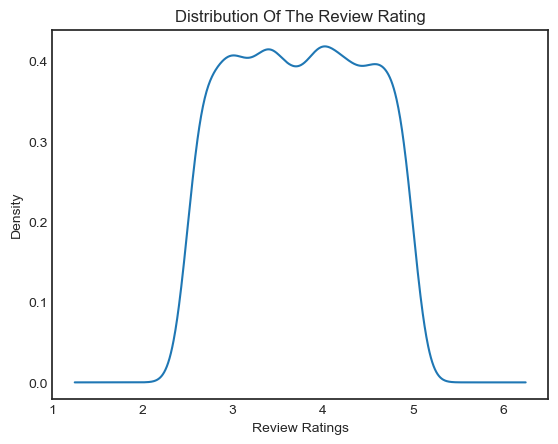

In [24]:
ax = df['Review Rating'].plot(kind = 'kde', title = 'Distribution Of The Review Rating')
ax.set_xlabel('Review Ratings')
ax.set_ylabel('Density')
plt.show()

##### Inference:
    Mean Review by the Customers is 3.75.

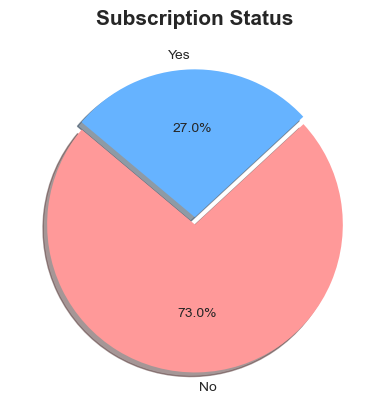

In [25]:
subscription_df = df['Subscription Status'].value_counts(normalize = True) *100
my_colors = ['#ff9999','#66b3ff']
ax = subscription_df.plot(kind = 'pie',
                         startangle=140, 
                          colors=my_colors, 
                            autopct='%1.1f%%',
                            explode=(0.05, 0),
                            shadow=True)
plt.title("Subscription Status", fontsize = 15, fontweight = 'bold')
plt.ylabel("")
plt.show()

#### Inference:
    1) 27% of the customers have subscribed

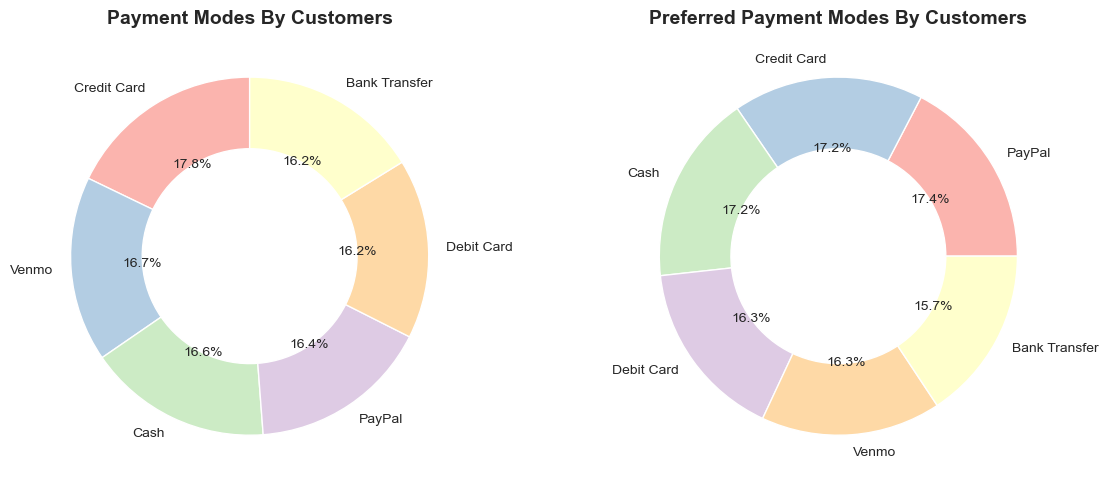

In [26]:
colors = plt.cm.Pastel1.colors

fig, ax = plt.subplots(1,2 ,figsize = (12,5))

df['Payment Method'].value_counts()\
    .plot(kind = 'pie',ax = ax[0],autopct = "%1.1f%%",startangle = 90,
         colors = colors, wedgeprops={'width': 0.4, 'edgecolor': 'w'})
ax[0].set_title("Payment Modes By Customers", fontsize=14, fontweight='bold')
ax[0].set_ylabel("")


df['Preferred Payment Method'].value_counts()\
    .plot(kind = 'pie',ax = ax[1],autopct = "%1.1f%%",
         colors = colors, wedgeprops={'width': 0.4, 'edgecolor': 'w'})
ax[1].set_title("Preferred Payment Modes By Customers", fontsize=14, fontweight='bold')
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

##### Inference:

    Top 3 modes of Payment are:
        1)Credit Card
        2)Venmo
        3)Cash

    Top 3 Preferred modes of Payment are:
        1)PayPal
        2)Credit Card
        3)Cash

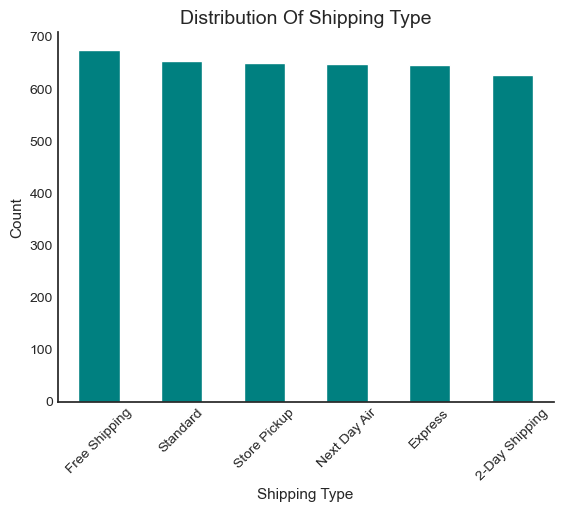

In [27]:
ax = df['Shipping Type'].value_counts().plot(kind = 'bar', color = 'teal', edgecolor = 'white')
ax.set_title("Distribution Of Shipping Type", fontsize = 14, fontweight = 14)
ax.set_xlabel("Shipping Type", fontsize =11)
ax.set_ylabel("Count", fontsize =11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.show()

#### Inference:
    Top 3 modes of Shipping Type:
        1)Free Shipping
        2)Standard Shipping
        3) Store Pickup

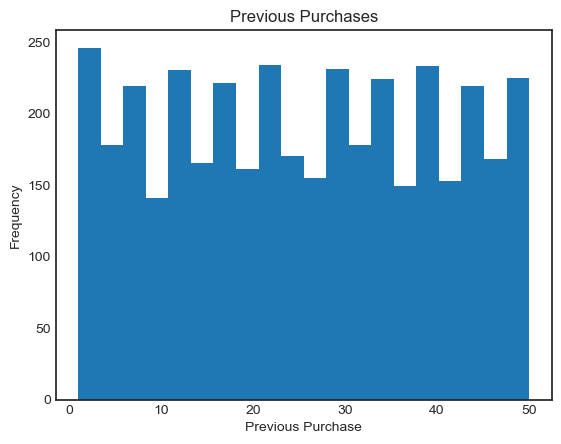

In [28]:
ax = df['Previous Purchases'].plot(kind = 'hist',bins = 20, title = 'Previous Purchases')
ax.set_xlabel('Previous Purchase')
ax.set_ylabel("Frequency")
plt.show()

#### Step 4: Feature Relationships

    .Scatterplot
    .heatmap
    .pairplot
    .Groupby Comparision

In [29]:
df.head(3)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [30]:
df.groupby(['Location','Category'])['Purchase Amount (USD)'].mean()\
    .unstack()\
    .head(5)

Category,Accessories,Clothing,Footwear,Outerwear
Location,,,,
Alabama,63.040000,56.926829,60.933333,54.625000
Alaska,66.115385,67.545455,77.000000,56.500000
Arizona,63.500000,66.531250,78.500000,65.142857
Arkansas,59.807692,65.216216,58.900000,45.166667
California,59.516129,58.297872,60.181818,59.666667


#### Inference : 
    Above are the top 5 Locations with Avg Spends on Categories

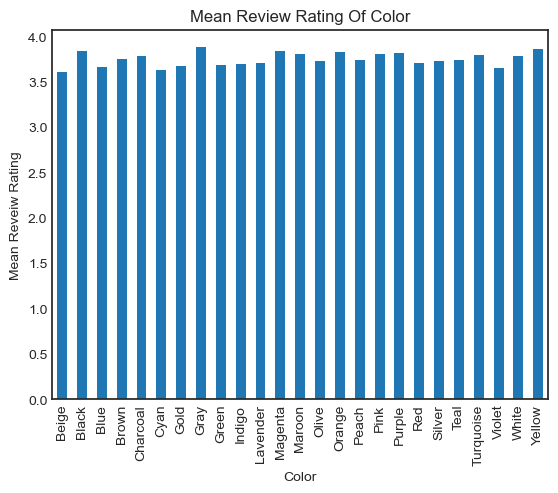

In [31]:
df.groupby('Color')['Review Rating'].mean()\
        .plot(kind = 'bar')
plt.xlabel('Color')
plt.ylabel('Mean Reveiw Rating')
plt.title("Mean Review Rating Of Color")
plt.show()

#### Inference:
    Above graph shows the Mean Review Ratings of all the colors

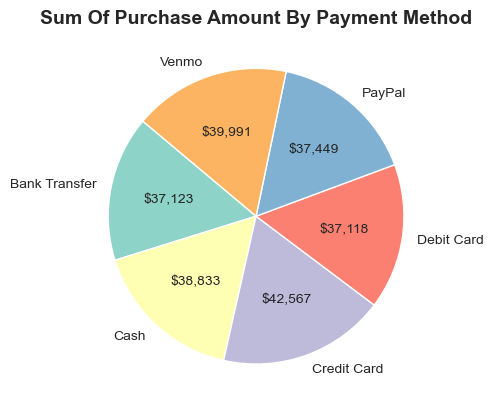

In [32]:
payment_sum = df.groupby('Payment Method')['Purchase Amount (USD)'].sum()
total_sum = payment_sum.sum()
payment_sum.plot(kind = 'pie',
                autopct = lambda p: f'${p*total_sum/100:,.0f}',
                startangle = 140,
                colors=plt.cm.Set3.colors,
                wedgeprops={'edgecolor': 'white'}
                )
plt.title("Sum Of Purchase Amount By Payment Method", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

#### Inference:
    Credit Card is preferred by the customers amounting to $42.5K , followed by Venmo($39.9K) and Cash($38.8K)

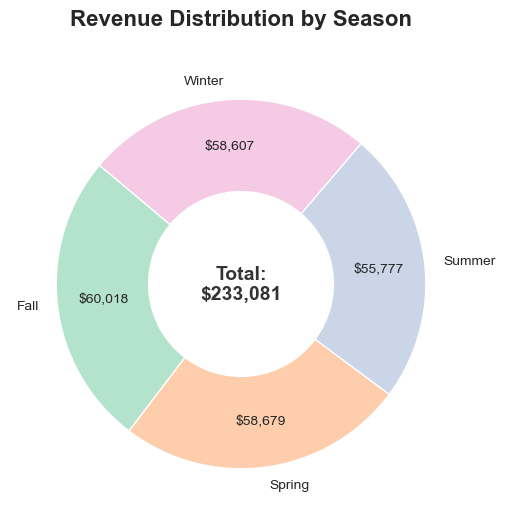

In [35]:
season_sum = df.groupby("Season")['Purchase Amount (USD)'].sum()
tot_sum = season_sum.sum()

fig, ax = plt.subplots(figsize=(8, 6))

season_sum.plot(kind = 'pie',
                autopct = lambda p: f'${p*tot_sum/100:,.0f}',
                startangle = 140,
                colors=plt.cm.Pastel2.colors,
                wedgeprops={'width': 0.5, 'edgecolor': 'white'},
                pctdistance=0.75,
                ax=ax
                )

ax.text(0, 0, f'Total:\n${tot_sum:,.0f}', 
        ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')
plt.title("Revenue Distribution by Season", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("")

plt.show()

##### Inference: 
    Fall Season has the highest Revenue amounting to $60k, followed by Spring season with over $58.67k

In [40]:
loyalty_insight = df.groupby('Subscription Status')\
    .agg(Average_spend = ('Purchase Amount (USD)', 'mean'),
         Total_revenue = ('Purchase Amount (USD)', 'sum'),
         Customer_count = ('Purchase Amount (USD)','count')
        )

loyalty_insight

,Average_spend,Total_revenue,Customer_count
Subscription Status,,,
No,59.865121,170436,2847
Yes,59.491928,62645,1053


#### Inference:
    1)It is observed that Subsribers spend marginally less than non subsribers on an average
    2)Total Spends by Non Subsribers is $170K and that of Subsribers are $62K
    
    

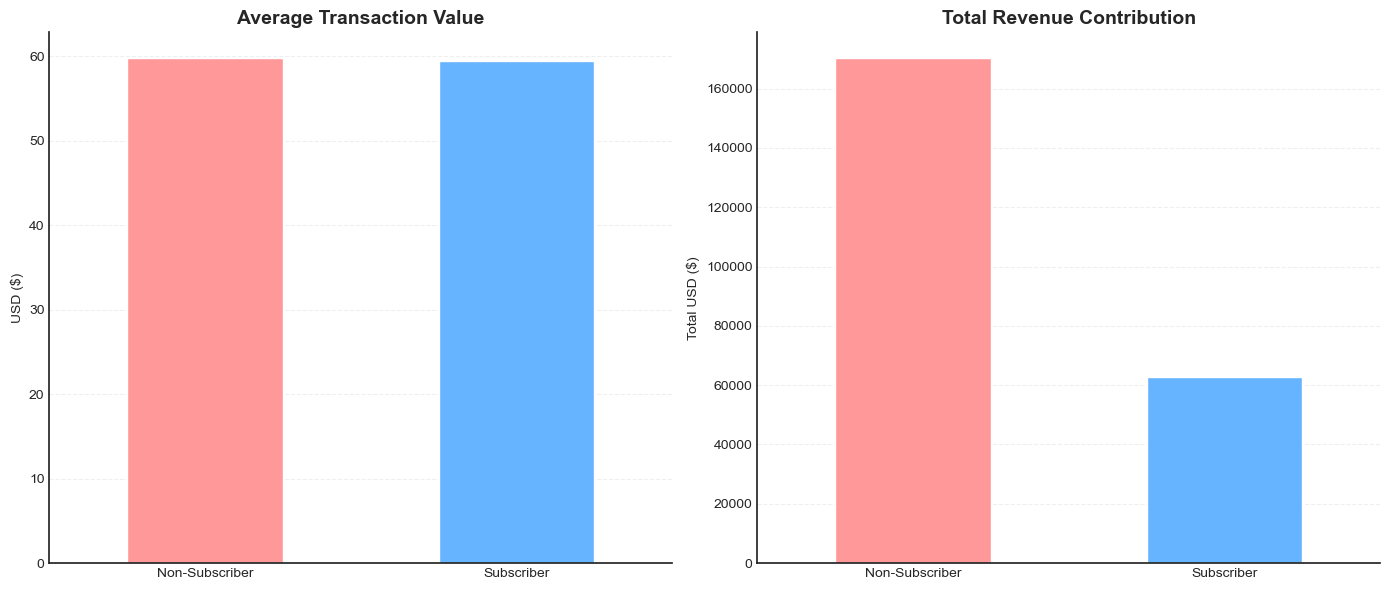

In [45]:
fig,ax = plt.subplots(1,2, figsize=(14, 6))

loyalty_insight['Average_spend'].plot(kind = 'bar',
                                      ax = ax[0],
                                      color=['#FF9999', '#66B3FF'],
                                      edgecolor='white')
ax[0].set_title('Average Transaction Value', fontsize=14, fontweight='bold')
ax[0].set_ylabel('USD ($)')
ax[0].set_xlabel('')
ax[0].set_xticklabels(['Non-Subscriber', 'Subscriber'], rotation=0)

loyalty_insight['Total_revenue'].plot(kind='bar', ax=ax[1], color=['#FF9999', '#66B3FF'], edgecolor='white')
ax[1].set_title('Total Revenue Contribution', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Total USD ($)')
ax[1].set_xlabel('')
ax[1].set_xticklabels(['Non-Subscriber', 'Subscriber'], rotation=0)

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
df.head(2)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


In [59]:
df.groupby('Location').agg(
    Total_spend=('Purchase Amount (USD)', 'sum'),
    Average_review=('Review Rating', 'mean')
).sort_values(by='Total_spend', ascending=False).head(10)

,Total_spend,Average_review
Location,,
Montana,5784,3.808333
Illinois,5617,3.644565
California,5605,3.834737
Idaho,5587,3.781720
Nevada,5514,3.712644
Alabama,5261,3.782022
New York,5257,3.747126
North Dakota,5220,3.751807
West Virginia,5174,3.580247


##### Inference: 
    Above are the top 10 locations sorted in descending order by total spends 

In [61]:
df.groupby('Location').agg(
    Total_spend=('Purchase Amount (USD)', 'sum'),
    Average_review=('Review Rating', 'mean')
).sort_values(by='Total_spend', ascending=True).tail(10)

,Total_spend,Average_review
Location,,
Nebraska,5172,3.728736
West Virginia,5174,3.580247
North Dakota,5220,3.751807
New York,5257,3.747126
Alabama,5261,3.782022
Nevada,5514,3.712644
Idaho,5587,3.781720
California,5605,3.834737
Illinois,5617,3.644565


#### Inference: 
    Above are the bottom 10 locations sorted by Total Spends

In [63]:
df.groupby('Promo Code Used')['Frequency of Purchases'].value_counts(normalize = True).unstack()

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Promo Code Used,,,,,,,
No,334,321,326,299,316,322,305
Yes,238,226,258,243,237,241,234


#### Inference:
    From the above it is observed that giving discounts to customers does not have major impact on the frequency of the purchases

In [69]:
df.pivot_table(index = 'Category',
               columns= 'Size', 
               values = 'Purchase Amount (USD)',
               aggfunc= 'sum',
               margins= True,
              margins_name='Grand Total')

Size,L,M,S,XL,Grand Total
Category,,,,,
Accessories,18636,33299,14091,8174,74200
Clothing,27864,47041,17416,11943,104264
Footwear,9908,16493,5802,3890,36093
Outerwear,5259,8334,3159,1772,18524
Grand Total,61667,105167,40468,25779,233081


#### Inference:
    From the above pivot table it is observed that 'Clothing Category' is the revenue driver and most value of sales are driven in the 'M' Category 